<a href="https://colab.research.google.com/github/Sanzid-Priam/Estimation-of-Kinetics-using-Kinetics-FM-DLR-Ensemble-Net/blob/main/Multi_modal_Public_Dataset_2_kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import numpy
import tensorflow as tf
import statistics 
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statistics import stdev 
import math
import h5py
 
import numpy as np

from scipy.signal import butter,filtfilt
 
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
import pandas
import matplotlib.pyplot as plt
 
## for Deep-learing:
import tensorflow.keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
to_categorical([0, 1, 2, 3], num_classes=4)
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import np_utils
import itertools
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Bidirectional
#import constraint
 
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
 
 
###  Library for attention layers 
 
import pandas as pd
#import pyarrow.parquet as pq # Used to read the data
import os 
import numpy as np
from tensorflow.keras.layers import * # Keras is the most friendly Neural Network library, this Kernel use a lot of layers classes
from tensorflow.keras.models import Model
#from tqdm import tqdm # Processing time measurement
from sklearn.model_selection import train_test_split 
from tensorflow.keras import backend as K # The backend give us access to tensorflow operations and allow us to create the Attention class
from tensorflow.keras import optimizers # Allow us to access the Adam class to modify some parameters
from sklearn.model_selection import GridSearchCV, StratifiedKFold # Used to use Kfold to train our model
from tensorflow.keras.callbacks import * # This object helps the model to train in a smarter way, avoiding overfitting
 
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
import statistics
import gc


 
### Early stopping 
 
from tensorflow.keras.callbacks import EarlyStopping

 

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16607452837286134994
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14417788928
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3266013214621100893
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
Mounted at /content/drive


# File path


# Data loader

In [30]:
if __name__ == '__main__':
    with h5py.File('/content/drive/My Drive/public dataset/all_17_subjects.h5', 'r') as hf:
        data_all_sub = {subject: subject_data[:] for subject, subject_data in hf.items()}
        data_fields = json.loads(hf.attrs['columns'])

In [53]:
def data_extraction(A):
  for k in range(len(A)):
    zero_index_1=np.all(A[k:k+1,:,:] == 0, axis=0)
    zero_index = np.multiply(zero_index_1, 1)
    zero_index=np.array(zero_index)

    for i in range(len(zero_index)):
      if (sum(zero_index[i])==256):
        index=i
        break;
    # print(index)
    B=A[k:k+1,20:index,:]
    C_1=B.reshape((B.shape[0]*B.shape[1],B.shape[2]))
    if (k==0):
      C=C_1
    else:
      C=np.append(C,C_1,axis=0)

  index_1 = data_fields.index('AccelX_R_FOOT')
  index_2 = data_fields.index('AccelY_R_FOOT')
  index_3 = data_fields.index('AccelZ_R_FOOT')
  index_4 = data_fields.index('GyroX_R_FOOT')
  index_5 = data_fields.index('GyroY_R_FOOT')
  index_6 = data_fields.index('GyroZ_R_FOOT')
  index_7 = data_fields.index('AccelX_R_SHANK')
  index_8 = data_fields.index('AccelY_R_SHANK')
  index_9 = data_fields.index('AccelZ_R_SHANK')
  index_10 = data_fields.index('GyroX_R_SHANK')
  index_11 = data_fields.index('GyroY_R_SHANK')
  index_12 = data_fields.index('GyroZ_R_SHANK')
  index_13 = data_fields.index('AccelX_R_THIGH')
  index_14 = data_fields.index('AccelY_R_THIGH')
  index_15 = data_fields.index('AccelZ_R_THIGH')
  index_16 = data_fields.index('GyroX_R_THIGH')
  index_17= data_fields.index('GyroY_R_THIGH')
  index_18 = data_fields.index('GyroZ_R_THIGH')
  index_19 = data_fields.index('EXT_KM_X')
  index_20 = data_fields.index('EXT_KM_Y')
  index_21 = data_fields.index('plate_2_force_x')
  index_22 = data_fields.index('plate_2_force_y')
  index_23 = data_fields.index('plate_2_force_z')
  index_24 = data_fields.index('body weight')
  index_25 = data_fields.index('body height')

  BW=(C[0:1, index_24]*9.8)
  BWH=(C[0:1, index_24]*9.8)*C[:, index_25]

  D=np.vstack((C[:, index_1],C[:, index_2],C[:, index_3],C[:, index_4],C[:, index_5],C[:, index_6],C[:, index_7],C[:, index_8],
              C[:, index_9],C[:, index_10],C[:, index_11],C[:, index_12],C[:, index_13],C[:, index_14]
              ,C[:, index_15],C[:, index_16],C[:, index_17],C[:, index_18],C[:, index_19],C[:, index_20],-C[:, index_21]/BW,
              -C[:, index_23]/BW,-C[:, index_22]/BW)).T


  D=np.hstack((D,C[:,109:153]))

  return D

In [51]:
# index_23 = data_fields.index('LShoulder_x_90')
# print(index_23)


In [49]:
# print(np.array(data_fields))

In [54]:
data_subject_01 = data_all_sub['subject_01']
data_subject_02 = data_all_sub['subject_02']
data_subject_03 = data_all_sub['subject_03']
data_subject_04 = data_all_sub['subject_04']
data_subject_05 = data_all_sub['subject_05']
data_subject_06 = data_all_sub['subject_06']
data_subject_07 = data_all_sub['subject_07']
data_subject_08 = data_all_sub['subject_08']
data_subject_09 = data_all_sub['subject_09']
data_subject_10 = data_all_sub['subject_10']
data_subject_11 = data_all_sub['subject_11']
data_subject_12 = data_all_sub['subject_12']
data_subject_13 = data_all_sub['subject_13']
data_subject_14 = data_all_sub['subject_14']
data_subject_15 = data_all_sub['subject_15']
data_subject_16 = data_all_sub['subject_16']
data_subject_17 = data_all_sub['subject_17']


subject_1=data_extraction(data_subject_01)
subject_2=data_extraction(data_subject_02)
subject_3=data_extraction(data_subject_03)
subject_4=data_extraction(data_subject_04)
subject_5=data_extraction(data_subject_05)
subject_6=data_extraction(data_subject_06)
subject_7=data_extraction(data_subject_07)
subject_8=data_extraction(data_subject_08)
subject_9=data_extraction(data_subject_09)
subject_10=data_extraction(data_subject_10)
subject_11=data_extraction(data_subject_11)
subject_12=data_extraction(data_subject_12)
subject_13=data_extraction(data_subject_13)
subject_14=data_extraction(data_subject_14)
subject_15=data_extraction(data_subject_15)
subject_16=data_extraction(data_subject_16)
subject_17=data_extraction(data_subject_17)


In [55]:
subject_1.shape

(67150, 67)

# Data processing and model Training

In [57]:
main_dir = "/content/drive/My Drive/public dataset/Public_dataset_2/Subject01"
# os.mkdir(main_dir) 
path="/content/drive/My Drive/public dataset/Public_dataset_2/Subject01/"
subject='Subject_01'

In [58]:
train_dataset=np.concatenate((subject_2,subject_3,subject_4,subject_5,subject_6,subject_7,subject_8,subject_9,
                              subject_10,subject_11,subject_12,subject_13,subject_14,subject_15,subject_16,subject_17),axis=0)

test_dataset=subject_1

In [ ]:
# Train features #
from sklearn.preprocessing import StandardScaler

x_train_1=train_dataset[:,0:18]
x_train_2=train_dataset[:,23:67]

x_train=np.concatenate((x_train_1,x_train_2),axis=1)

scale= StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
train_X_1_1=x_train
 
# # Test features #
x_test_1=test_dataset[:,0:18]
x_test_1=test_dataset[:,23:67]
test_X_1_1=x_test


  ### Label ###

train_y_1_1=train_dataset[:,18:23]
test_y_1_1=test_dataset[:,18:23]

train_dataset_1=np.concatenate((train_X_1_1,train_y_1_1),axis=1)
test_dataset_1=np.concatenate((test_X_1_1,test_y_1_1),axis=1)

train_dataset_1=pd.DataFrame(train_dataset_1)
test_dataset_1=pd.DataFrame(test_dataset_1)

train_dataset_1.dropna(axis=0,inplace=True)
test_dataset_1.dropna(axis=0,inplace=True)

train_dataset_1=np.array(train_dataset_1)
test_dataset_1=np.array(test_dataset_1)

train_dataset_sum = np. sum(train_dataset_1)
array_has_nan = np. isnan(train_dataset_sum)

print(array_has_nan)

print(train_dataset_1.shape)



train_X_1=train_dataset_1[:,0:18]
test_X_1=test_dataset_1[:,0:18]

train_y_1=train_dataset_1[:,18:23]
test_y_1=test_dataset_1[:,18:23]



L1=len(train_X_1)
L2=len(test_X_1)

print(L1+L2)
 
w=50

                   
 
a1=L1//w
b1=L1%w
 
a2=L2//w
b2=L2%w

# a3=L3//w
# b3=L3%w 
 
     #### Features ####
train_X_2=train_X_1[L1-w+b1:L1,:]
test_X_2=test_X_1[L2-w+b2:L2,:]
# validation_X_2=validation_X_1[L3-w+b3:L3,:]
 

    #### Output ####
 
train_y_2=train_y_1[L1-w+b1:L1,:]
test_y_2=test_y_1[L2-w+b2:L2,:]
# validation_y_2=validation_y_1[L3-w+b3:L3,:]


 
     #### Features ####
    
train_X=np.concatenate((train_X_1,train_X_2),axis=0)
test_X=np.concatenate((test_X_1,test_X_2),axis=0)
# validation_X=np.concatenate((validation_X_1,validation_X_2),axis=0)
 
 
    #### Output ####
    
train_y=np.concatenate((train_y_1,train_y_2),axis=0)
test_y=np.concatenate((test_y_1,test_y_2),axis=0)
# validation_y=np.concatenate((validation_y_1,validation_y_2),axis=0)

    
print(train_y.shape) 
    #### Reshaping ####
train_X_3_p= train_X.reshape((a1+1,w,train_X.shape[1]))
test_X = test_X.reshape((a2+1,w,test_X.shape[1]))


train_y_3_p= train_y.reshape((a1+1,w,5))
test_y= test_y.reshape((a2+1,w,5))

 

# train_X_1D=train_X_3
test_X_1D=test_X

train_X_3=train_X_3_p
train_y_3=train_y_3_p
# print(train_X_4.shape,train_y_3.shape)


train_X_1D, X_validation_1D, train_y_5, Y_validation = train_test_split(train_X_3,train_y_3, test_size=0.20, random_state=True)
#train_X_1D, X_validation_1D_ridge, train_y, Y_validation_ridge = train_test_split(train_X_1D_m,train_y_m, test_size=0.10, random_state=True)   [0:2668,:,:]

print(train_X_1D.shape,train_y_5.shape,X_validation_1D.shape,Y_validation.shape)

features=6

train_X_2D=train_X_1D.reshape(train_X_1D.shape[0],train_X_1D.shape[1],features,3)
test_X_2D=test_X_1D.reshape(test_X_1D.shape[0],test_X_1D.shape[1],features,3)
X_validation_2D= X_validation_1D.reshape(X_validation_1D.shape[0],X_validation_1D.shape[1],features,3)
#X_validation_2D_ridge= X_validation_1D_ridge.reshape(X_validation_1D_ridge.shape[0],X_validation_1D_ridge.shape[1],8,2)


print(train_X_2D.shape,test_X_2D.shape,X_validation_2D.shape)

import tensorflow as tf
# tensorflow import keras
from tensorflow.keras import layers

Bag_samples=train_X_2D.shape[0]
print(Bag_samples)

s=test_X_1D.shape[0]*w

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

False
(984864, 23)
1048716
(984900, 5)
(15758, 50, 18) (15758, 50, 5) (3940, 50, 18) (3940, 50, 5)
(15758, 50, 6, 3) (1278, 50, 6, 3) (3940, 50, 6, 3)
15758


0

In [ ]:
test_y_plot=test_y.reshape(test_y.shape[0]*test_y.shape[1],test_y.shape[2])
test_y_plot.shape

(63900, 5)

In [ ]:
train_y_plot=train_y_3.reshape(train_y_3.shape[0]*train_y_3.shape[1],train_y_3.shape[2])
train_y_plot.shape

(984900, 5)

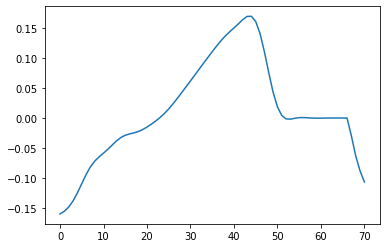

In [ ]:
plt.plot(test_y_plot[15044:15115,4])

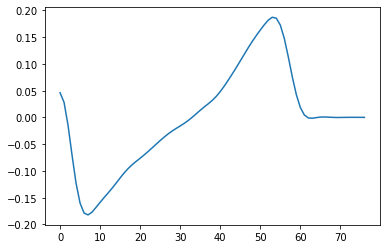

In [ ]:
plt.plot(test_y_plot[0:77,4])

# Important Functions

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
import pickle
from sklearn.linear_model import Ridge
from sklearn.utils import resample

    


"""# Loss Function"""

from keras import backend as K
def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    # r = K.maximum(K.minimum(r, 1.0), -1.0)

    l1=K.sqrt(K.mean(K.square(y_pred - y_true)))
    #l2=1-K.square(r)
    l2=1-r

    l=l2
    return l

from keras import backend as K
def correlation_coefficient_loss_1(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    r = K.maximum(K.minimum(r, 1.0), -1.0)

    l1=K.sqrt(K.mean(K.square(y_pred - y_true)))
    l2=1-K.square(r)

    l=l1
    return l

from keras import backend as K
def correlation_coefficient_loss_joint(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den

    #r = K.maximum(K.minimum(r, 1.0), -1.0)

    l1=K.sqrt(K.mean(K.square(y_pred - y_true)))
    #l2=1-K.square(r)
    l2=1-r

    l=l1+l2
    return l
    



def RMSE_prediction(yhat_4,test_y,s):
 
  test_o=test_y.reshape((s,5))
  yhat=yhat_4.reshape((s,5))
  
  
  
  
  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  # y_6_no=yhat[:,5]
  # y_7_no=yhat[:,6]
  #y_8_no=yhat[:,7]
  #y_9_no=yhat[:,8]
  #y_10_no=yhat[:,9]
  
  
  
  
  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  # y_test_6=test_o[:,5]
  # y_test_7=test_o[:,6]
  #y_test_8=test_o[:,7]
  #y_test_9=test_o[:,8]
  #y_test_10=test_o[:,9]
  
  
  
  
  
  #print(y_1.shape,y_test_1.shape)
  
  
  
  cutoff=6
  fs=200
  order=4
  
  nyq = 0.5 * fs
  ## filtering data ##
  def butter_lowpass_filter(data, cutoff, fs, order):
      normal_cutoff = cutoff / nyq
      # Get the filter coefficients 
      b, a = butter(order, normal_cutoff, btype='low', analog=False)
      y = filtfilt(b, a, data)
      return y
  
  
  
  y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
  y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
  y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
  y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
  y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
  # y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
  # y_7=butter_lowpass_filter(y_7_no, cutoff, fs, order)
  #y_8=butter_lowpass_filter(y_8_no, cutoff, fs, order)
  #y_9=butter_lowpass_filter(y_9_no, cutoff, fs, order)
  #y_10=butter_lowpass_filter(y_10_no, cutoff, fs, order)
  
  
  
  
  Z_1=y_1
  Z_2=y_2
  Z_3=y_3
  Z_4=y_4
  Z_5=y_5
  # Z_6=y_6
  # Z_7=y_7
  #Z_8=y_8
  #Z_9=y_9
  #Z_10=y_10
  
  
  
  ###calculate RMSE
  
  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
  # rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
  # rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
  #rmse_8 =((np.sqrt(mean_squared_error(y_test_8,y_8)))/(max(y_test_8)-min(y_test_8)))*100
  #rmse_9 =((np.sqrt(mean_squared_error(y_test_9,y_9)))/(max(y_test_9)-min(y_test_9)))*100
  #rmse_10 =((np.sqrt(mean_squared_error(y_test_10,y_10)))/(max(y_test_10)-min(y_test_10)))*100
  
  
  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  # print(rmse_6)
  # print(rmse_7)
  #print(rmse_8)
  #print(rmse_9)
  #print(rmse_10)
  
  
  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  # p_6=np.corrcoef(y_6, y_test_6)[0, 1]
  # p_7=np.corrcoef(y_7, y_test_7)[0, 1]
  #p_8=np.corrcoef(y_8, y_test_8)[0, 1]
  #p_9=np.corrcoef(y_9, y_test_9)[0, 1]
  #p_10=np.corrcoef(y_10, y_test_10)[0, 1]
  
  
  print("\n") 
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  # print(p_6)
  # print(p_7)
  #print(p_8)
  #print(p_9)
  #print(p_10)
  
  
              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])
  
  
  
  
      #### Mean and standard deviation ####
  
  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])
  
      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)
   
  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)

  return rmse, p, Z_1,Z_2,Z_3,Z_4,Z_5


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


def PCC_prediction(yhat_4,test_y,s):
 
  test_o=test_y.reshape((s,5))
  yhat=yhat_4.reshape((s,5))
  
  
  
  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  # y_6_no=yhat[:,5]
  # y_7_no=yhat[:,6]
  
  
  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  # y_test_6=test_o[:,5]
  # y_test_7=test_o[:,6]
  
  
  
  cutoff=6
  fs=200
  order=4
  
  nyq = 0.5 * fs
  ## filtering data ##
  def butter_lowpass_filter(data, cutoff, fs, order):
      normal_cutoff = cutoff / nyq
      # Get the filter coefficients 
      b, a = butter(order, normal_cutoff, btype='low', analog=False)
      y = filtfilt(b, a, data)
      return y
  
  
  
  y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
  y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
  y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
  y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
  y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
  # y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
  # y_7=butter_lowpass_filter(y_7_no, cutoff, fs, order)
  
  
  Y_1=y_1
  Y_2=y_2
  Y_3=y_3
  Y_4=y_4
  Y_5=y_5
  # Y_6=y_6
  # Y_7=y_7
  
  
  ###calculate RMSE
  
  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
  # rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
  # rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
  
  
  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  # print(rmse_6)
  # print(rmse_7)
  
  
  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  # p_6=np.corrcoef(y_6, y_test_6)[0, 1]
  # p_7=np.corrcoef(y_7, y_test_7)[0, 1]
  
  
  print("\n") 
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  # print(p_6)
  # print(p_7)
  
  
  
              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])
  
  
  
  
      #### Mean and standard deviation ####
  
  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])
  
      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)
   
  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)
  
  
  return rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5
  

############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)  


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################



def DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5):

  a_1,b_1=estimate_coef(Y_1,Z_1)
  a_2,b_2=estimate_coef(Y_2,Z_2)
  a_3,b_3=estimate_coef(Y_3,Z_3)
  a_4,b_4=estimate_coef(Y_4,Z_4)
  a_5,b_5=estimate_coef(Y_5,Z_5)
  
  #### All 16 angles prediction  ####
  
   
  test_o=test_y.reshape((s,5))
  yhat=yhat_4.reshape((s,5))
  
  
  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  # y_6_no=yhat[:,5]
  # y_7_no=yhat[:,6]
  
  
  
  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  # y_test_6=test_o[:,5]
  # y_test_7=test_o[:,6]
  
  
  cutoff=6
  fs=200
  order=4
  
  nyq = 0.5 * fs
  ## filtering data ##
  def butter_lowpass_filter(data, cutoff, fs, order):
      normal_cutoff = cutoff / nyq
      # Get the filter coefficients 
      b, a = butter(order, normal_cutoff, btype='low', analog=False)
      y = filtfilt(b, a, data)
      return y
  
  
  
  y_1=butter_lowpass_filter(y_1_no, cutoff, fs, order)
  y_2=butter_lowpass_filter(y_2_no, cutoff, fs, order)
  y_3=butter_lowpass_filter(y_3_no, cutoff, fs, order)
  y_4=butter_lowpass_filter(y_4_no, cutoff, fs, order)
  y_5=butter_lowpass_filter(y_5_no, cutoff, fs, order)
  # y_6=butter_lowpass_filter(y_6_no, cutoff, fs, order)
  # y_7=butter_lowpass_filter(y_7_no, cutoff, fs, order)
  
  
  
  y_1=y_1*b_1+a_1
  y_2=y_2*b_2+a_2
  y_3=y_3*b_3+a_3
  y_4=y_4*b_4+a_4
  y_5=y_5*b_5+a_5
  # y_6=y_6*b_6+a_6
  # y_7=y_7*b_7+a_7
  
  
  ###calculate RMSE
  
  rmse_1 =((np.sqrt(mean_squared_error(y_test_1,y_1)))/(max(y_test_1)-min(y_test_1)))*100
  rmse_2 =((np.sqrt(mean_squared_error(y_test_2,y_2)))/(max(y_test_2)-min(y_test_2)))*100
  rmse_3 =((np.sqrt(mean_squared_error(y_test_3,y_3)))/(max(y_test_3)-min(y_test_3)))*100
  rmse_4 =((np.sqrt(mean_squared_error(y_test_4,y_4)))/(max(y_test_4)-min(y_test_4)))*100
  rmse_5 =((np.sqrt(mean_squared_error(y_test_5,y_5)))/(max(y_test_5)-min(y_test_5)))*100
  # rmse_6 =((np.sqrt(mean_squared_error(y_test_6,y_6)))/(max(y_test_6)-min(y_test_6)))*100
  # rmse_7 =((np.sqrt(mean_squared_error(y_test_7,y_7)))/(max(y_test_7)-min(y_test_7)))*100
  
  
  
  
  
  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  # print(rmse_6)
  # print(rmse_7)
  
  
  
  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  # p_6=np.corrcoef(y_6, y_test_6)[0, 1]
  # p_7=np.corrcoef(y_7, y_test_7)[0, 1]
  
  
  print("\n") 
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  # print(p_6)
  # print(p_7)
  
  
              ### Correlation ###
  p=np.array([p_1,p_2,p_3,p_4,p_5])
  
  
  
      #### Mean and standard deviation ####
  
  rmse=np.array([rmse_1,rmse_2,rmse_3,rmse_4,rmse_5])
  
      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)
   
  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)
  
  return rmse, p





############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


# Function of Base Models

## GRU-Net

In [ ]:
##################### 1. GRU-Net  #################################################


num_pred=5

def GRU_Net(inputs_1D_N,inputs_2D_N):
  
  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.3)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)
  
  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)

  return (output_GRU)  
  
def GRU_Net_pcc(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.25)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.25)(model_1)
  model_1=Flatten()(model_1)

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)  
  return (output_GRU)
  
  

## Conv2D-Net

In [ ]:
 #############################################################################################################################################
########################  2. Conv2D-Net  ####################################################################################################
  
def Conv2D_Net(inputs_1D_N,inputs_2D_N):

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.05)(X)

  X=Flatten()(X)

  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)

  return (output_C2)
  
def Conv2D_Net_pcc(inputs_1D_N,inputs_2D_N):

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  # X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  # X=Dropout(0.05)(X)

  X=Flatten()(X)

  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001),activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)

  
  return (output_C2)  
  

## Conv1D-Net

In [ ]:
###################################################################################################################################################################
#########################################################  3. Conv1D-Net  ######################################################################################################

def Conv1D_Net(inputs_1D_N,inputs_2D_N):

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  

  return (output_C1)

  
  
def Conv1D_Net_pcc(inputs_1D_N,inputs_2D_N):


  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  
  return (output_C1)  
  
####################################################################################################################################################################################  


## GRU-Conv2D-Net

In [ ]:
def GRU_Conv2D_Net(inputs_1D_N,inputs_2D_N):
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.05)(X)

  X=Flatten()(X)

  X=concatenate([X,model_2])

  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  
  return (output_C2)  
  
def GRU_Conv2D_Net_pcc(inputs_1D_N,inputs_2D_N):

  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  # X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  # X=Dropout(0.05)(X)

  X=Flatten()(X)

  X=concatenate([X,model_2])

  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001),activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)

  return (output_C2)
  

## GRU-Conv1D-Net

In [ ]:
def GRU_Conv1D_Net(inputs_1D_N,inputs_2D_N):
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  

  return (output_C1)

  
def GRU_Conv1D_Net_pcc(inputs_1D_N,inputs_2D_N):

  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  
  return (output_C1)  
  

## Conv2D-Conv1D-Net

In [ ]:
def Conv2D_Conv1D_Net(inputs_1D_N,inputs_2D_N):
  
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.05)(X)

  X=Flatten()(X)


  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,X])

  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  

  return (output_C1)

  
def Conv2D_Conv1D_Net_pcc(inputs_1D_N,inputs_2D_N):

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  # X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  # X=Dropout(0.05)(X)

  X=Flatten()(X)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,X])

  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  
  return (output_C1)  
  

## Kinetics-Sub-Net-1

In [ ]:
#########################################################################################################################################################################  
####################################################   10. Kinetics-Net   ####################################################################

def Kinetics_Sub_Net_1(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.3)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.05)(X)

  X=Flatten()(X)

  X=concatenate([X,model_2])
  
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.1)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.1)(model_3)
  model_3=Flatten()(model_3)

  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  output = Average()([output_GRU,output_C2])

  return (output_C2,output_GRU,output)

  
def Kinetics_Sub_Net_1_pcc(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.25)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.25)(model_1)
  model_1=Flatten()(model_1)
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  # X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  # X=Dropout(0.05)(X)

  X=Flatten()(X)
  X=concatenate([X,model_2])
  
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  
  output = Average()([output_GRU,output_C2])
  
  return (output_C2,output_GRU,output)


## Kinetics-Sub-Net-2

In [ ]:
#########################################################################################################################################################################  
####################################################   10. Kinetics-Net   ####################################################################

def Kinetics_Sub_Net_2(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.3)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.05)(X)

  X=Flatten()(X)

  X=concatenate([X,model_2])
  
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.1)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.1)(model_3)
  model_3=Flatten()(model_3)

  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  output = Average()([output_GRU,output_C1])

  return (output_C1,output_GRU,output)

  
def Kinetics_Sub_Net_2_pcc(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.25)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.25)(model_1)
  model_1=Flatten()(model_1)
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  # X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  # X=Dropout(0.05)(X)

  X=Flatten()(X)
  X=concatenate([X,model_2])
  
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  
  output = Average()([output_GRU,output_C1])
  
  return (output_C1,output_GRU,output)


## Kinetics-Sub-Net-3

In [ ]:
#########################################################################################################################################################################  
####################################################   10. Kinetics-Net   ####################################################################

def Kinetics_Sub_Net_3(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.3)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.05)(X)

  X=Flatten()(X)

  X=concatenate([X,model_2])
  
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.1)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.1)(model_3)
  model_3=Flatten()(model_3)

  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  output = Average()([output_C2,output_C1])

  return (output_C1,output_C2,output)

  
def Kinetics_Sub_Net_3_pcc(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.25)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.25)(model_1)
  model_1=Flatten()(model_1)
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  # X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  # X=Dropout(0.05)(X)

  X=Flatten()(X)
  X=concatenate([X,model_2])
  
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  
  output = Average()([output_C2,output_C1])
  
  return (output_C1,output_C2,output)


## Kinetics-Net

In [ ]:
#########################################################################################################################################################################  
####################################################   10. Kinetics-Net   ####################################################################

def Kinetics_Net(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.3)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.05)(X)

  X=Flatten()(X)

  X=concatenate([X,model_2])
  
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.1)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.1)(model_3)
  model_3=Flatten()(model_3)

  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  output = Average()([output_C2,output_C1,output_GRU])

  return (output_C1,output_C2,output_GRU,output)

  
def Kinetics_Net_pcc(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.25)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.25)(model_1)
  model_1=Flatten()(model_1)
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  # X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  # X=Dropout(0.05)(X)

  X=Flatten()(X)
  X=concatenate([X,model_2])
  
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)
  
  
  output = Average()([output_C2,output_C1,output_GRU])
  
  return (output_C1,output_C2,output_GRU,output)


## Kinetics-FM-Net

In [ ]:
#########################################################################################################################################################################  
####################################################   10. Kinetics-Net   ####################################################################

def Kinetics_FM_Net(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.3)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.3)(model_1)
  model_1=Flatten()(model_1)
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.05)(X)

  X=Flatten()(X)

  X=concatenate([X,model_2])
  
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.1)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.1)(model_3)
  model_3=Flatten()(model_3)

  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)

  output_GRU_1=Dense(128,activation='relu')(output_GRU)
  output_GRU_1=Dense(num_pred,activation='sigmoid')(output_GRU_1)
  #output_GRU_1=Dense(1,activation='sigmoid')(output_GRU_1)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])
  
  output_C2_1=Dense(128,activation='relu')(output_C2)
  output_C2_1=Dense(num_pred,activation='sigmoid')(output_C2_1)
  #output_C2_1=Dense(1,activation='sigmoid')(output_C2_1)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])

  output_C1_1=Dense(128,activation='relu')(output_C1)
  output_C1_1=Dense(num_pred,activation='sigmoid')(output_C1_1)
  #output_C1_1=Dense(1,activation='sigmoid')(output_C1_1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])
  

  weight=output_GRU_1+output_C2_1+output_C1_1
  
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])
  

  output = output_GRU_2+output_C1_2+output_C2_2
  

  return (output_C1,output_C2,output_GRU,output)

  
def Kinetics_FM_Net_pcc(inputs_1D_N,inputs_2D_N):

  model_1=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_1=Dropout(0.25)(model_1)
  model_1=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_1)
  model_1=Dropout(0.25)(model_1)
  model_1=Flatten()(model_1)
  
  model_2=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_2=Dropout(0.3)(model_2)
  model_2=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_2)
  model_2=Dropout(0.3)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(256, (5, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(256, (5, 3), activation='relu',padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)
  X=Conv2D(512, (5, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 1))(X)

  X=Dense(64, activation='relu')(X)
  # X=Dropout(0.05)(X)
  X=Dense(32,activation='relu')(X)
  # X=Dropout(0.05)(X)

  X=Flatten()(X)
  X=concatenate([X,model_2])
  
  
  model_3=GRU(512,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.000001),return_sequences=True)(inputs_1D_N)
  model_3=Dropout(0.3)(model_3)
  model_3=GRU(256,kernel_regularizer=l2(0.000001), recurrent_regularizer=l2(0.000001), bias_regularizer=l2(0.0000001),return_sequences=True)(model_3)
  model_3=Dropout(0.3)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=256, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=512, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  # CNN=Dropout(0.05)(CNN)
  CNN=Flatten()(CNN)

  CNN=concatenate([CNN,model_3])

  output_GRU=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_GRU=Reshape(target_shape=(w,num_pred))(output_GRU)
  output_C2=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C2=Reshape(target_shape=(w,num_pred))(output_C2)
  output_C1=Dense(num_pred*w,bias_regularizer=l2(0.001), activation='linear')(CNN)
  output_C1=Reshape(target_shape=(w,num_pred))(output_C1)

  
  output_GRU_1=Dense(128,activation='relu')(output_GRU)
  output_GRU_1=Dropout(0.4)(output_GRU_1)
  #output_GRU_1=Dense(64,activation='relu')(output_GRU_1)
  output_GRU_1=Dense(num_pred,activation='sigmoid')(output_GRU_1)
  #output_GRU_1=Dense(1,activation='sigmoid')(output_GRU_1)
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])
  
  output_C2_1=Dense(128,activation='relu')(output_C2)
  output_C2_1=Dropout(0.4)(output_C2_1)
  #output_C2_1=Dense(64,activation='relu')(output_C2_1)
  output_C2_1=Dense(num_pred,activation='sigmoid')(output_C2_1)
  #output_C2_1=Dense(1,activation='sigmoid')(output_C2_1)
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])

  output_C1_1=Dense(128,activation='relu')(output_C1)
  output_C1_1=Dropout(0.4)(output_C1_1)
  #output_C1_1=Dense(64,activation='relu')(output_C1_1)
  output_C1_1=Dense(num_pred,activation='sigmoid')(output_C1_1)
  #output_C1_1=Dense(1,activation='sigmoid')(output_C1_1)
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])
  

  weight=output_GRU_1+output_C2_1+output_C1_1
  
  output_GRU_2 = tf.keras.layers.Multiply()([output_GRU, output_GRU_1])
  output_C2_2 = tf.keras.layers.Multiply()([output_C2, output_C2_1])
  output_C1_2 = tf.keras.layers.Multiply()([output_C1, output_C1_1])
  
  output = output_GRU_2+output_C1_2+output_C2_2
    
  return (output_C1,output_C2,output_GRU,output)


# Model Training

## Early Stopping

In [ ]:
custom_early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=15,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
) 

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

## GRU-Net

In [ ]:
### GRU-NET ###

inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Net(inputs_1D_N,inputs_2D_N)

model_1 = tf.keras.Model(inputs=[inputs_1D, inputs_2D], outputs=output)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True, callbacks=[custom_early_stopping])


model_1.save(path+'model_GRU.h5')
print('>Saved %s' % path)

############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


gc.collect()

yhat_4= model_1.predict([test_X_1D,test_X_2D])

s=test_X_1D.shape[0]*w

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_GRU=rmse
PCC_GRU=p

gc.collect()
gc.collect()

In [ ]:
### GRU-NET ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Net_pcc(inputs_1D_N,inputs_2D_N)

model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], train_y_5, epochs=50, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])

gc.collect()


model_2.save(path+'model_GRU_PCC.h5')



############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


yhat_4 = model_2.predict([test_X_1D,test_X_2D])

rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)

RMSE_GRU_DLR=rmse
PCC_GRU_DLR=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()


In [ ]:
### GRU-NET ###
  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Net(inputs_1D_N,inputs_2D_N)
model_3 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer=opt, metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


model_3.save(path+'model_GRU_JL.h5')


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


#### All 16 angles prediction  ####

yhat_4= model_3.predict([test_X_1D,test_X_2D])


rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)

RMSE_GRU_JL=rmse
PCC_GRU_JL=p



ablation_1=np.hstack([RMSE_GRU,PCC_GRU])
ablation_2=np.hstack([RMSE_GRU_DLR,PCC_GRU_DLR])
ablation_3=np.hstack([RMSE_GRU_JL,PCC_GRU_JL])

GRU_result=np.vstack([ablation_1,ablation_2,ablation_3])

## Conv2D-Net

In [ ]:
### Conv2D-NET ###

inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv2D_Net(inputs_1D_N,inputs_2D_N)


model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2,\
                    shuffle=True,callbacks=[custom_early_stopping])



model_1.save(path+'model_Conv2D.h5')


############################################################################################################################################################################################################################################################################################################################################################################################################################################################################


gc.collect()

#### All 16 angles prediction  ####

yhat_4 = model_1.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_Conv2D=rmse
PCC_Conv2D=p

gc.collect()
gc.collect()


In [ ]:
### Conv2D_Net-NET ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv2D_Net_pcc(inputs_1D_N,inputs_2D_N)

model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], train_y_5, epochs=50, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, \
                    shuffle=True,callbacks=[custom_early_stopping])

model_2.save(path+'model_Conv2D_PCC.h5')


gc.collect()

#### All 16 angles prediction  ####

yhat_4 = model_2.predict([test_X_1D,test_X_2D])

rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)



RMSE_Conv2D_DLR=rmse
PCC_Conv2D_DLR=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

In [ ]:
### Conv2D-NET ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv2D_Net(inputs_1D_N,inputs_2D_N)

model_3 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer=opt, metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2,\
                    shuffle=True,callbacks=[custom_early_stopping])



model_3.save(path+'model_Conv2D_JL.h5')

yhat_4= model_3.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_Conv2D_JL=rmse
PCC_Conv2D_JL=p

ablation_4=np.hstack([RMSE_Conv2D,PCC_Conv2D])
ablation_5=np.hstack([RMSE_Conv2D_DLR,PCC_Conv2D_DLR])
ablation_6=np.hstack([RMSE_Conv2D_JL,PCC_Conv2D_JL])

Conv2D_result=np.vstack([ablation_4,ablation_5,ablation_6])

## Conv1D-Net

In [ ]:
"""# Conv1D-Net, Conv1D-DLR-Net, Conv1D-JL-Net

"""

### Conv1D-NET ###
  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv1D_Net(inputs_1D_N,inputs_2D_N)

model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2,\
                    shuffle=True,callbacks=[custom_early_stopping])



model_1.save(path+'model_Conv1D.h5')


gc.collect()

#### All 16 angles prediction  ####
yhat_4 = model_1.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_Conv1D=rmse
PCC_Conv1D=p

gc.collect()
gc.collect()


In [ ]:
### Conv1D-NET ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv1D_Net_pcc(inputs_1D_N,inputs_2D_N)

model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], train_y_5, epochs=50, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2,\
                    shuffle=True,callbacks=[custom_early_stopping])



model_2.save(path+'model_Conv1D_PCC.h5')
gc.collect()


yhat_4 = model_2.predict([test_X_1D,test_X_2D])

rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)



RMSE_Conv1D_DLR=rmse
PCC_Conv1D_DLR=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

In [ ]:
### Conv1D-NET ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv1D_Net(inputs_1D_N,inputs_2D_N)

model_3 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer=opt, metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation),\
                    verbose=2, shuffle=True,callbacks=[custom_early_stopping])


model_3.save(path+'model_Conv1D_JL.h5')


yhat_4= model_3.predict([test_X_1D,test_X_2D])


rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)

RMSE_Conv1D_JL=rmse
PCC_Conv1D_JL=p

ablation_7=np.hstack([RMSE_Conv1D,PCC_Conv1D])
ablation_8=np.hstack([RMSE_Conv1D_DLR,PCC_Conv1D_DLR])
ablation_9=np.hstack([RMSE_Conv1D_JL,PCC_Conv1D_JL])

Conv1D_result=np.vstack([ablation_7,ablation_8,ablation_9])

## GRU-Conv2D-Net

In [ ]:
### GRU-Conv2D-Net ###
  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Conv2D_Net(inputs_1D_N,inputs_2D_N)

model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



model_1.save(path+'model_GRU_Conv2D.h5')


gc.collect()

#### All 16 angles prediction  ####
yhat_4 = model_1.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)

RMSE_GRU_Conv2D=rmse
PCC_GRU_Conv2D=p

gc.collect()
gc.collect()

In [ ]:
### GRU-Conv2D-DLR-Net ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Conv2D_Net_pcc(inputs_1D_N,inputs_2D_N)

model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], train_y_5, epochs=50, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



model_2.save(path+'model_GRU_Conv2D_PCC.h5')



yhat_4 = model_2.predict([test_X_1D,test_X_2D])

rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)



RMSE_GRU_Conv2D_DLR=rmse
PCC_GRU_Conv2D_DLR=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

In [ ]:
#################   GRU-Conv2D-JL-Net    #####################


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Conv2D_Net(inputs_1D_N,inputs_2D_N)

model_3 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer=opt, metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


model_3.save(path+'model_GRU_Conv2D_JL.h5')



yhat_4= model_3.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_GRU_Conv2D_JL=rmse
PCC_GRU_Conv2D_JL=p

ablation_10=np.hstack([RMSE_GRU_Conv2D,PCC_GRU_Conv2D])
ablation_11=np.hstack([RMSE_GRU_Conv2D_DLR,PCC_GRU_Conv2D_DLR])
ablation_12=np.hstack([RMSE_GRU_Conv2D_JL,PCC_GRU_Conv2D_JL])

GRU_Conv2D_result=np.vstack([ablation_10,ablation_11,ablation_12])

## GRU-Conv1D-Net




In [ ]:
### GRU-Conv1D-Net ###
  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Conv1D_Net(inputs_1D_N,inputs_2D_N)

model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



model_1.save(path+'model_GRU_Conv1D.h5')


gc.collect()

#### All 16 angles prediction  ####
yhat_4 = model_1.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)

RMSE_GRU_Conv1D=rmse
PCC_GRU_Conv1D=p


gc.collect()
gc.collect()

In [ ]:
### GRU-Conv1D-DLR-Net ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Conv1D_Net_pcc(inputs_1D_N,inputs_2D_N)

model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], train_y_5, epochs=50, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])

model_2.save(path+'model_GRU_Conv1D_PCC.h5')


gc.collect()


yhat_4 = model_2.predict([test_X_1D,test_X_2D])


rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)


RMSE_GRU_Conv1D_DLR=rmse
PCC_GRU_Conv1D_DLR=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

In [ ]:
#################   GRU-Conv1D-JL-Net    #####################


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Conv1D_Net(inputs_1D_N,inputs_2D_N)

model_3 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer=opt, metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



model_3.save(path+'model_GRU_Conv1D_JL.h5')



yhat_4= model_3.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)

RMSE_GRU_Conv1D_JL=rmse
PCC_GRU_Conv1D_JL=p

ablation_13=np.hstack([RMSE_GRU_Conv1D,PCC_GRU_Conv1D])
ablation_14=np.hstack([RMSE_GRU_Conv1D_DLR,PCC_GRU_Conv1D_DLR])
ablation_15=np.hstack([RMSE_GRU_Conv1D_JL,PCC_GRU_Conv1D_JL])

GRU_Conv1D_result=np.vstack([ablation_13,ablation_14,ablation_15])

## Conv2D-Conv1D-Net

In [ ]:

### Conv2D-Conv1D-Net ###
  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv2D_Conv1D_Net(inputs_1D_N,inputs_2D_N)

model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



model_1.save(path+'model_Conv2D_Conv1D.h5')


gc.collect()

#### All 16 angles prediction  ####
yhat_4 = model_1.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_Conv2D_Conv1D=rmse
PCC_Conv2D_Conv1D=p


gc.collect()
gc.collect()

In [ ]:
### Conv2D-Conv1D-DLR-Net ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv2D_Conv1D_Net_pcc(inputs_1D_N,inputs_2D_N)

model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], train_y_5, epochs=50, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


model_2.save(path+'model_Conv2D_Conv1D_PCC.h5')


gc.collect()


yhat_4 = model_2.predict([test_X_1D,test_X_2D])


rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)


RMSE_Conv2D_Conv1D_DLR=rmse
PCC_Conv2D_Conv1D_DLR=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

In [ ]:
#################   Conv2D-Conv1D-JL-Net    #####################


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Conv1D_Net(inputs_1D_N,inputs_2D_N)

model_3 = Model(inputs=[inputs_1D, inputs_2D], outputs=output)

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer=opt, metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], train_y_5, epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], Y_validation), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



model_3.save(path+'model_Conv2D_Conv1D_JL.h5')



yhat_4= model_3.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_Conv2D_Conv1D_JL=rmse
PCC_Conv2D_Conv1D_JL=p

ablation_16=np.hstack([RMSE_Conv2D_Conv1D,PCC_Conv2D_Conv1D])
ablation_17=np.hstack([RMSE_Conv2D_Conv1D_DLR,PCC_Conv2D_Conv1D_DLR])
ablation_18=np.hstack([RMSE_Conv2D_Conv1D_JL,PCC_Conv2D_Conv1D_JL])

Conv2D_Conv1D_result=np.vstack([ablation_16,ablation_17,ablation_18])

## Kinetics-Sub-Net-1

In [ ]:
### Kinetics-Sub-Net-1 ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Kinetics_Sub_Net_1(inputs_1D_N,inputs_2D_N)

model_1= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



gc.collect()


model_1.save(path+'model_Kinetics_Sub_1.h5')

#### All 16 angles prediction  ####

[yhat_1,yhat_2,yhat_4] = model_1.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)



RMSE_Kinetics_Sub_Net_1=rmse
PCC_Kinetics_Sub_Net_1=p

gc.collect()
gc.collect()

In [ ]:
### Kinetics-Sub-DLR-Net-1 ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Kinetics_Sub_Net_1_pcc(inputs_1D_N,inputs_2D_N)



model_2= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=50, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


model_2.save(path+'model_Kinetics_Sub_1_PCC.h5')


gc.collect()

#### All 16 angles prediction  ####

[yhat_1,yhat_2,yhat_4] = model_2.predict([test_X_1D,test_X_2D])

rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)


RMSE_Kinetics_Sub_DLR_Net_1=rmse
PCC_Kinetics_Sub_DLR_Net_1=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

In [ ]:
### Kinetics-Sub-JL-Net-1 ###

  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Kinetics_Sub_Net_1(inputs_1D_N,inputs_2D_N)



model_3= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_3.compile(loss=correlation_coefficient_loss_joint, optimizer=opt, metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


model_3.save(path+'model_Kinetics_Sub_1_JL.h5')


#### All 16 angles prediction  ####


[yhat_1,yhat_2,yhat_4]= model_3.predict([test_X_1D,test_X_2D])


rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_Kinetics_Sub_JL_Net_1=rmse
PCC_Kinetics_Sub_JL_Net_1=p

ablation_19=np.hstack([RMSE_Kinetics_Sub_Net_1,PCC_Kinetics_Sub_Net_1])
ablation_20=np.hstack([RMSE_Kinetics_Sub_DLR_Net_1,PCC_Kinetics_Sub_DLR_Net_1])
ablation_21=np.hstack([RMSE_Kinetics_Sub_JL_Net_1,PCC_Kinetics_Sub_JL_Net_1])

Kinetics_Sub_Net_1_result=np.vstack([ablation_19,ablation_20,ablation_21])

## Kinetics-Sub-Net-2

In [ ]:
### Kinetics-Sub-Net-2 ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Kinetics_Sub_Net_2(inputs_1D_N,inputs_2D_N)

model_1= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])

# # # summarize history for loss

gc.collect()


model_1.save(path+'model_Kinetics_Sub_2.h5')

#### All 16 angles prediction  ####

[yhat_1,yhat_2,yhat_4] = model_1.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_Kinetics_Sub_Net_2=rmse
PCC_Kinetics_Sub_Net_2=p

gc.collect()
gc.collect()

In [ ]:
### Kinetics-Sub-DLR-Net-1 ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Kinetics_Sub_Net_2_pcc(inputs_1D_N,inputs_2D_N)



model_2= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=50, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


model_2.save(path+'model_Kinetics_Sub_2_PCC.h5')


gc.collect()

#### All 16 angles prediction  ####

[yhat_1,yhat_2,yhat_4] = model_2.predict([test_X_1D,test_X_2D])

rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)


RMSE_Kinetics_Sub_DLR_Net_2=rmse
PCC_Kinetics_Sub_DLR_Net_2=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

In [ ]:
### Kinetics-Sub-JL-Net-2 ###

  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Kinetics_Sub_Net_2(inputs_1D_N,inputs_2D_N)



model_3= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_3.compile(loss=correlation_coefficient_loss_joint, optimizer=opt, metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


model_3.save(path+'model_Kinetics_Sub_2_JL.h5')


#### All 16 angles prediction  ####


[yhat_1,yhat_2,yhat_4]= model_3.predict([test_X_1D,test_X_2D])


rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_Kinetics_Sub_JL_Net_2=rmse
PCC_Kinetics_Sub_JL_Net_2=p

ablation_22=np.hstack([RMSE_Kinetics_Sub_Net_2,PCC_Kinetics_Sub_Net_2])
ablation_23=np.hstack([RMSE_Kinetics_Sub_DLR_Net_2,PCC_Kinetics_Sub_DLR_Net_2])
ablation_24=np.hstack([RMSE_Kinetics_Sub_JL_Net_2,PCC_Kinetics_Sub_JL_Net_2])

Kinetics_Sub_Net_2_result=np.vstack([ablation_22,ablation_23,ablation_24])

## Kinetics-Sub-Net-3

In [ ]:
### Kinetics-Sub-Net-3 ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Kinetics_Sub_Net_3(inputs_1D_N,inputs_2D_N)

model_1= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


gc.collect()


model_1.save(path+'model_Kinetics_Sub_3.h5')

#### All 16 angles prediction  ####

[yhat_1,yhat_2,yhat_4] = model_1.predict([test_X_1D,test_X_2D])


rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)



RMSE_Kinetics_Sub_Net_3=rmse
PCC_Kinetics_Sub_Net_3=p

gc.collect()
gc.collect()


In [ ]:
### Kinetics-Sub-DLR-Net-3 ###


  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Kinetics_Sub_Net_3_pcc(inputs_1D_N,inputs_2D_N)

model_2= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=50, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


model_2.save(path+'model_Kinetics_Sub_3_PCC.h5')


gc.collect()

#### All 16 angles prediction  ####

[yhat_1,yhat_2,yhat_4] = model_2.predict([test_X_1D,test_X_2D])

rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)


RMSE_Kinetics_Sub_DLR_Net_3=rmse
PCC_Kinetics_Sub_DLR_Net_3=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()


In [ ]:
### Kinetics-Sub-JL-Net-2 ###

  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Kinetics_Sub_Net_3(inputs_1D_N,inputs_2D_N)


model_3= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])


model_3.compile(loss=correlation_coefficient_loss_joint, optimizer=opt, metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



model_3.save(path+'model_Kinetics_Sub_3_JL.h5')


#### All 16 angles prediction  ####


[yhat_1,yhat_2,yhat_4]= model_3.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_Kinetics_Sub_JL_Net_3=rmse
PCC_Kinetics_Sub_JL_Net_3=p

ablation_25=np.hstack([RMSE_Kinetics_Sub_Net_3,PCC_Kinetics_Sub_Net_3])
ablation_26=np.hstack([RMSE_Kinetics_Sub_DLR_Net_3,PCC_Kinetics_Sub_DLR_Net_3])
ablation_27=np.hstack([RMSE_Kinetics_Sub_JL_Net_3,PCC_Kinetics_Sub_JL_Net_3])

Kinetics_Sub_Net_3_result=np.vstack([ablation_25,ablation_26,ablation_27])

## Kinetics-Net

In [ ]:
### Kinetics-Net ###

  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Kinetics_Net(inputs_1D_N,inputs_2D_N)


model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])

model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



model_1.save(path+'model_Kinetics.h5')


gc.collect()


[yhat_1,yhat_2,yhat_3,yhat_4] = model_1.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


gc.collect()

RMSE_Kinetics=rmse
PCC_Kinetics=p

In [ ]:

inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Kinetics_Net_pcc(inputs_1D_N,inputs_2D_N)

model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])

model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=50, batch_size=64, validation_data=([X_validation_1D,X_validation_2D],\
                                                                            [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])


model_2.save(path+'model_Kinetics_PCC.h5')


gc.collect()


[yhat_1,yhat_2,yhat_3,yhat_4] = model_2.predict([test_X_1D,test_X_2D])

rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)


RMSE_Kinetics_DLR=rmse
PCC_Kinetics_DLR=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

gc.collect()


In [ ]:

  
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Kinetics_Net(inputs_1D_N,inputs_2D_N)

model_3= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer=opt, metrics=[correlation_coefficient_loss_joint])

history=model_3.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])




model_3.save(path+'model_Kinetics_JL.h5')



gc.collect()

#### All 16 angles prediction  ####

[yhat_1,yhat_2,yhat_3,yhat_4] = model_3.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


RMSE_Kinetics_JL=rmse
PCC_Kinetics_JL=p

ablation_28=np.hstack([RMSE_Kinetics,PCC_Kinetics])
ablation_29=np.hstack([RMSE_Kinetics_DLR,PCC_Kinetics_DLR])
ablation_30=np.hstack([RMSE_Kinetics_JL,PCC_Kinetics_JL])

Kinetics_result=np.vstack([ablation_28,ablation_29,ablation_30])


## Kinetics-FM-Net

In [ ]:
inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Kinetics_FM_Net(inputs_1D_N,inputs_2D_N)

model_1 = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])

model_1.compile(loss=correlation_coefficient_loss_1, optimizer=opt, metrics=[correlation_coefficient_loss_1])


history=model_1.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



model_1.save(path+'model_Kinetics_FM.h5')


gc.collect()


[yhat_1,yhat_2,yhat_3,yhat_4] = model_1.predict([test_X_1D,test_X_2D])


rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)


gc.collect()

RMSE_Kinetics_FM=rmse
PCC_Kinetics_FM=p

In [ ]:

inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output_1,output_2,output_3,output=Kinetics_FM_Net_pcc(inputs_1D_N,inputs_2D_N)
model_2 = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])


model_2.compile(loss=correlation_coefficient_loss, optimizer=opt, metrics=[correlation_coefficient_loss])


history=model_2.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=55, batch_size=64, validation_data=([X_validation_1D,X_validation_2D],\
                                                                                        [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])



model_2.save(path+'model_Kinetics_FM_PCC.h5')


gc.collect()


[yhat_1,yhat_2,yhat_3,yhat_4] = model_2.predict([test_X_1D,test_X_2D])

rmse, p, Y_1,Y_2,Y_3,Y_4,Y_5=PCC_prediction(yhat_4,test_y,s)
rmse,p=DLR_prediction(yhat_4,test_y,s,Y_1,Y_2,Y_3,Y_4,Y_5,Z_1,Z_2,Z_3,Z_4,Z_5)


RMSE_Kinetics_FM_DLR=rmse
PCC_Kinetics_FM_DLR=p

gc.collect()
gc.collect()
gc.collect()
gc.collect()


In [ ]:

inputs_1D = tf.keras.layers.Input( shape=(w,18) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,3) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Kinetics_FM_Net(inputs_1D_N,inputs_2D_N)

model_3= Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])

model_3.compile(loss=correlation_coefficient_loss_joint, optimizer='Adam', metrics=[correlation_coefficient_loss_joint])


history=model_3.fit([train_X_1D,train_X_2D], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=40, batch_size=64, validation_data=([X_validation_1D,X_validation_2D], \
                                                                                          [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=True,callbacks=[custom_early_stopping])




model_3.save(path+'model_Kinetics_FM_JL.h5')



gc.collect()

#### All 16 angles prediction  ####

[yhat_1,yhat_2,yhat_3,yhat_4] = model_3.predict([test_X_1D,test_X_2D])

rmse,p,Z_1,Z_2,Z_3,Z_4,Z_5=RMSE_prediction(yhat_4,test_y,s)

RMSE_Kinetics_FM_JL=rmse
PCC_Kinetics_FM_JL=p

ablation_31=np.hstack([RMSE_Kinetics_FM,PCC_Kinetics_FM])
ablation_32=np.hstack([RMSE_Kinetics_FM_DLR,PCC_Kinetics_FM_DLR])
ablation_33=np.hstack([RMSE_Kinetics_FM_JL,PCC_Kinetics_FM_JL])

Kinetics_FM_result=np.vstack([ablation_31,ablation_32,ablation_33])


## Result Summary

In [ ]:
All_result=np.vstack([GRU_result,Conv2D_result,Conv1D_result,GRU_Conv2D_result,GRU_Conv1D_result,Conv2D_Conv1D_result,Kinetics_Sub_Net_1_result,Kinetics_Sub_Net_2_result,Kinetics_Sub_Net_3_result,Kinetics_result,Kinetics_FM_result])

from numpy import savetxt

savetxt(path+subject+'_All_results.csv', All_result, delimiter=',')